In [29]:
import numpy as np
import predictthumb, perfect, pooled, predictthumbGP, averageoffset
reload(predictthumb)
reload(perfect)
reload(pooled)
reload(predictthumbGP)
reload(averageoffset)

noregr = []
pool = []
perf = []
pred = []
predGP = []
averGP = []

pool_mse = np.zeros((15,4))
perf_mse = np.zeros((15,4))
pred_mse = np.zeros((15,4))
predGP_mse = np.zeros((15,4))
averGP_mse = np.zeros((15,4))

for i in range(3,18):
    print ("Processing user %d" %i)
    
    before, after, b_x, b_y, a_x, a_y = predictthumb.run(i)
    pred.append(after[1])
    pred_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = pooled.run(i)
    pool.append(after[1])
    pool_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = predictthumbGP.run(i)
    predGP.append(after[1])
    predGP_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = perfect.run(i)
    perf.append(after[1])
    noregr.append(before[1])
    perf_mse[i-3] = np.array([b_x, b_y, a_x, a_y])
    
    before, after, b_x, b_y, a_x, a_y = averageoffset.run(i)
    averGP.append(after[1])
    averGP_mse[i-3] = np.array([b_x, b_y, a_x, a_y])

print "###################"    
print "Processing Complete"    

Processing user 3
Processing user 4
Processing user 5
Processing user 6
Processing user 7
Processing user 8
Processing user 9
Processing user 10
Processing user 11
Processing user 12
Processing user 13
Processing user 14
Processing user 15
Processing user 16
Processing user 17
###################
Processing Complete


##Touches within 2mm virtual button##

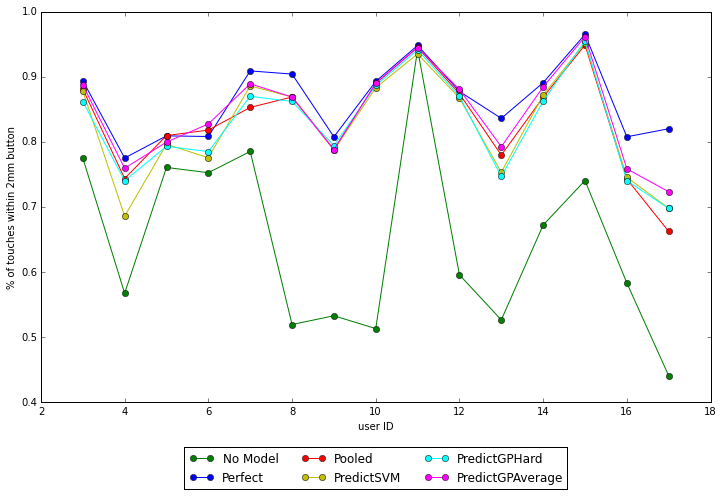

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), noregr, marker='o', color ='g', label='No Model')
plt.errorbar(range(3,18), perf, marker='o', color = 'b', label='Perfect')
plt.errorbar(range(3,18), pool, marker='o', color='r', label='Pooled')
plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGPHard')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='PredictGPAverage')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

##Only thumb prediction models##

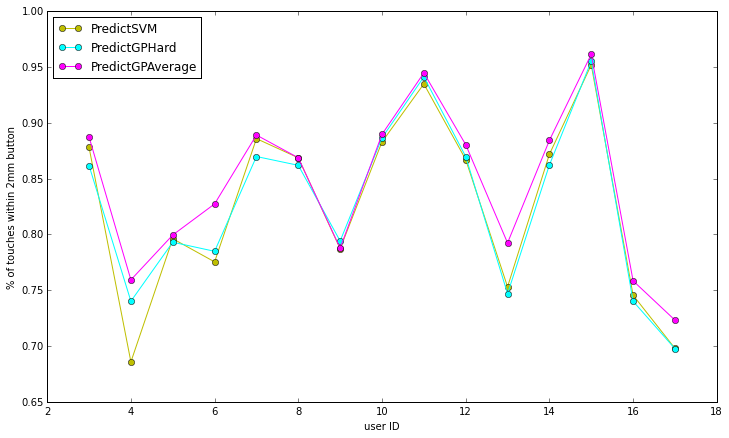

In [31]:
fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), pred, marker='o', color = 'y', label='PredictSVM')
plt.errorbar(range(3,18), predGP, marker='o', color='cyan', label='PredictGPHard')
plt.errorbar(range(3,18), averGP, marker='o', color='magenta', label='PredictGPAverage')

plt.legend(loc='best')
plt.xlabel('user ID')
plt.ylabel('% of touches within 2mm button')
plt.show()

In [32]:
pred_a = pred_mse[:,[2,3]]
perf_a = perf_mse[:,[2,3]]
predGP_a = predGP_mse[:,[2,3]]
averGP_a = averGP_mse[:,[2,3]]

np.set_printoptions(precision=2)
table = np.concatenate((pool_mse, perf_a, pred_a, predGP_a, averGP_a),1)
print table

[[ 133.37  103.2    77.54  102.13   80.57   91.25   81.45   98.93   80.48
   101.38   79.59   99.21]
 [ 193.69  204.55  131.68  144.01  125.39  115.4   134.51  167.97  130.84
   133.65  126.94  127.16]
 [  89.59  189.68   81.18  147.2    80.92  148.15   88.43  151.3    83.48
   158.27   81.9   148.19]
 [ 114.52  139.14   90.94  135.65   81.79  137.84   98.63  141.35   98.03
   143.49   90.99  139.23]
 [  93.34  133.94   63.72  122.68   59.43   80.35   66.7    99.58   66.99
   106.89   63.81  101.14]
 [ 310.01  132.02   66.93  120.19   59.18  104.85   63.06  130.5    63.72
   133.6    62.72  119.33]
 [ 248.49  213.72   89.46  142.03   90.25  133.2    91.12  153.     95.05
   151.67   88.21  143.68]
 [ 313.93  141.34   63.39  114.6    59.65  116.09   64.87  117.37   65.32
   118.24   62.67  115.96]
 [  91.84   75.37   77.59   70.66   78.03   69.16   80.74   70.27   81.3
    69.48   78.17   69.23]
 [ 315.34   94.02   96.03   87.79   88.77   89.95   92.42   90.43   92.72
    94.6    92.99 

In [33]:
print np.mean(table, 0)

[ 202.4   155.12   87.1   130.24   81.68  110.39   89.09  133.16   89.48
  134.57   85.74  124.02]
